In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Description of the data:**
- **Company:** Represents sample companies.
- **Time:** Time shows different time periods that data belongs to. Time series length varies between 1 to 14 for each company.
- **Third column:** The target variable is denoted by "Financial Distress" if it is greater than -0.50 the company should be considered as healthy (0). Otherwise, it would be regarded as financially distressed (1).
- **Fourth column to the last column:** The features denoted by x1 to x83, are some financial and non-financial characteristics of the sampled companies. These features belong to the previous time period, which should be used to predict whether the company will be financially distressed or not (classification). Feature x80 is a categorical variable.


In [688]:
data = pd.read_csv('./Financial_Distress.csv')

In [689]:
# Checking out the data
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


## **Preparations**

In [690]:
# renaming the columns to lower case 
data.rename(columns=lambda x: x.lower(), inplace=True) 
data.rename(columns={'financial distress': 'distress'}, inplace=True) # Renaming 'financial distress' for simplicity

In [691]:
data[data['company']==1] # Checking out a single company

,company,time,distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52


In [692]:
print(f"There are {data['x80'].nunique()} categories in the x80 column.")
print(f"The categories are: {list(data['x80'].unique())}.")

There are 37 categories in the x80 column.
The categories are: [22, 29, 25, 12, 23, 9, 28, 14, 11, 18, 26, 21, 3, 20, 15, 7, 24, 19, 27, 1, 4, 17, 6, 8, 5, 2, 16, 13, 10, 30, 31, 32, 34, 35, 36, 33, 37].


## **Encoding the 'x80' categorical data**

In [693]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cat_data = data['x80']

label = LabelEncoder()
int_data = label.fit_transform(cat_data)
int_data = int_data.reshape(len(int_data), 1)

onehot_data = OneHotEncoder(sparse=False)
onehot_data = onehot_data.fit_transform(int_data)

print(onehot_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [694]:
onehot_data.shape[0] == data.shape[0] # Making sure the shapes are correct

True

In [695]:
onehot_data[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [696]:
categories = ['c'+str(n) for n in range(1, len(onehot_data[0])+1)] # creating a list of column names for our new data
cat_df = pd.DataFrame(onehot_data, columns=categories)

In [697]:
cat_df['c22'].head() # Making sure the encoding works properly

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: c22, dtype: float64

In [698]:
data = pd.concat([data, cat_df], axis=1) 

In [699]:
data[data['company']==1] # Checking out the first company

,company,time,distress,x1,x2,x3,x4,x5,x6,x7,...,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Metrics**

In [700]:
# DF for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                       columns=['NULL', 'LogRegression', 'NaiveBayes', 'RandomForest'])

- **Accuracy**: the proportion of the total number of predictions that are correct
- **Precision**: the proportion of positive predictions that are correct
- **Recall**: the proportion of correctly predicted positive values

**In this application:**
- **Accuracy**: How often does the model correctly predict the companies that went bankrupt?
- **Precision**: When they model predicts **bankrupt**, how often is it correct?
- **Recall**: The proportion of the **correctly** predicted companies that went bankrupt?

**Which metric should I use?**
- **False Positive:** A company who stays healthy labeled as bankrupt
- **False Negative:** A company who went bankrupt labeled as healthy

**False negatives are worse in this case, so we are going to look for a better recall**

In [701]:
df1 = pd.DataFrame(data['company'])
df2 = pd.DataFrame(data['distress'])

df_min_distress = pd.concat([df1, df2], axis=1)

In [702]:
data = data.groupby(by='company').mean() # Grouping the original DF by company and mean for all the values
data = data.drop(['distress'], axis=1) # Dropping the distress column, because having mean of the distress would make no sense

df_min_distress = df_min_distress.groupby('company').min() # Grouping the old DF by company, but with min() of distress this time

data = pd.concat([data, df_min_distress], axis=1) # Concating the the DFs back together

In [703]:
labels = [0, ] # Creating a list to store the labels, also with 1 element to combat the zero indexing

for i in range(1, data.shape[0]+1):
    if data['distress'][i] <= -0.5:
        labels.append(1)
    else:
        labels.append(0)

labels = pd.DataFrame(labels)
labels.rename(columns= {0 : 'distress'}, inplace=True)
labels = labels.drop(0) # dropping the first row to bypass the zero indexing


In [704]:
data = data.drop('distress', axis=1) # Dropping the old 'wrong' labels from data
data = pd.concat([data, labels], axis=1) # Concating the DF with the correct binary labels

In [705]:
# Importing train_test_split, metrics and StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [706]:
target = 'distress' # labels
X = data.drop(target, axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [707]:
def confMatrix(matrix, labels=['healthy', 'distressed']):
    df = pd.DataFrame(data=matrix, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

## **The NULL model that always predicts the most common category**

In [708]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
confMatrix(CM)

C:\Users\alis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,healthy,distressed,Total
TRUE,,,
healthy,85,0,85
distressed,42,0,42
Total,127,0,127


## **Naive Bayes**

In [709]:
from sklearn.naive_bayes import GaussianNB

# Creating an instance for the Gaussian Naive Bayes Classifier
naiveBayes = GaussianNB()

# Fitting the training data into our estimator
naiveBayes.fit(X_train, y_train)

# Evaluating the model
y_pred_test = naiveBayes.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Conf. matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
confMatrix(CM)

PREDICTION,healthy,distressed,Total
TRUE,,,
healthy,30,55,85
distressed,3,39,42
Total,33,94,127


## **Random Forest**

In [710]:
from sklearn.ensemble import RandomForestClassifier

# Creating an instance for the Random Forest Classifier
randomForest = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

# Fitting it
randomForest.fit(X_train, y_train)

# Evaluating the model
y_pred_test = naiveBayes.predict(X_test)
metrics.loc['accuracy', 'RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Conf. matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
confMatrix(CM)

PREDICTION,healthy,distressed,Total
TRUE,,,
healthy,30,55,85
distressed,3,39,42
Total,33,94,127


## **Logistic Regression**

In [711]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of the LogisticRegression estimator
logReg = LogisticRegression(n_jobs=-1, random_state=100) # n_jobs=-1 to use all thread available

# Fitting the training data into our estimator
logReg.fit(X_train, y_train)

# Evaluating the model
y_pred_test = logReg.predict(X_test)
metrics.loc['accuracy', 'LogRegression'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'LogRegression'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'LogRegression'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Conf. matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
confMatrix(CM)

PREDICTION,healthy,distressed,Total
TRUE,,,
healthy,77,8,85
distressed,5,37,42
Total,82,45,127


In [712]:
# The DataFrame of our metrics in %
metrics*100

,NULL,LogRegression,NaiveBayes,RandomForest
accuracy,66.9291,89.7638,54.3307,54.3307
precision,0,82.2222,41.4894,41.4894
recall,0,88.0952,92.8571,92.8571


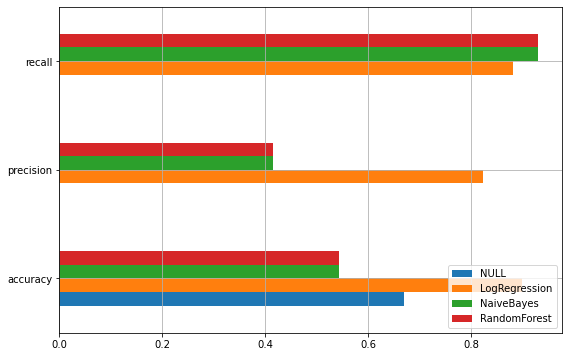

In [713]:
fig, ax = plt.subplots(figsize=(9,6))
metrics.plot(kind='barh', ax=ax)
ax.grid()

### Logistic Regression seems to work the best in this case, since we get the most accuracy for a small cost of little recall.

## **Confusion matrix for modified Logistic Regression Classifier**

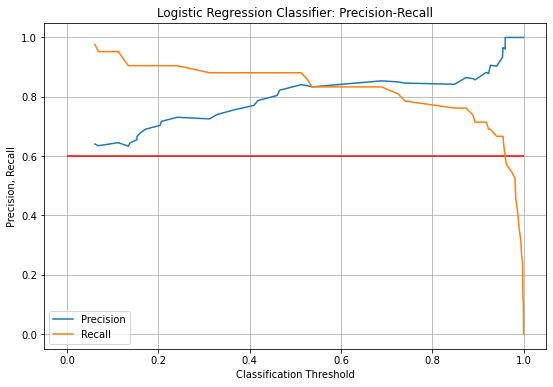

In [714]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid()

## **Classifier with threshold of 0.5**

In [715]:
y_pred_proba = logReg.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_test >= 0.5).astype('int')
# Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Recall: ', 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print('Precision: ', 100*precision_score(y_pred=y_pred_test, y_true=y_test))
confMatrix(CM)

Recall:  88.09523809523809
Precision:  82.22222222222221


PREDICTION,healthy,distressed,Total
TRUE,,,
healthy,77,8,85
distressed,5,37,42
Total,82,45,127


## **Making Individual Predictions**

In [716]:
def makePrediction(subject):
    data = subject.values.reshape(1, -1)
    data = scaler.transform(data)
    prob = logReg.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Distressed'
    else:
        return 'Healthy'

In [717]:
from collections import OrderedDict

new_company = []
for i, d in data.iloc[70].iteritems(): # Taking a random company from our data set for convenience 
    new_company.append((i, d))

new_company = OrderedDict(new_company) # Transforming it into an OrderedDict
del new_company['distress'] # Removing the label

new_company = pd.Series(new_company) # Transforming it into pandas Series
makePrediction(new_company) 

'Distressed'